In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import copy

In [3]:
# Configure the device gpu is required for faster 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [12]:
IMG_SIZE = 512
data_loader = transforms.Compose([transforms.Resize((IMG_SIZE, IMG_SIZE)), transforms.ToTensor()])
def load_img(filename):
    image = Image.open(filename)
    image = data_loader(image).unsqueeze(0)
    return image.to(device, torch.float)
style_img = load_img("./data/images/style.jpg")
content_img = load_img("./data/images/content.jpg")

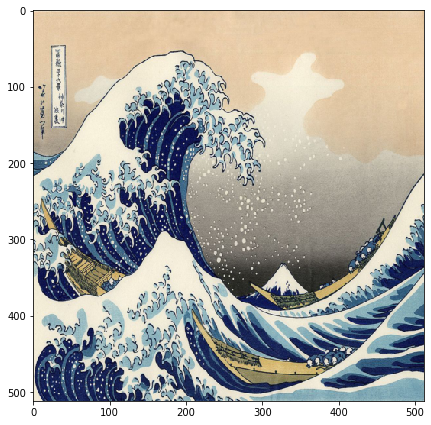

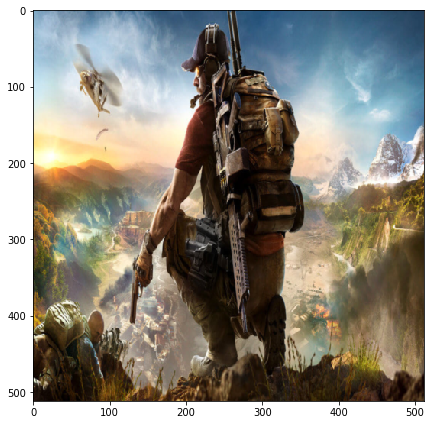

In [34]:
unloader = transforms.ToPILImage()
plt.ion()

def imshow(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    plt.imshow(image)
    plt.pause(0.001)
    
plt.figure(figsize=(7, 10))
imshow(style_img)

plt.figure(figsize=(7, 10))
imshow(content_img)